得到测试数据的预测preds后，我们可以使用sklearn的confusion_matrix函数来计算混淆矩阵，其中preds是预测结果，y_test是真实结果。

In [32]:
#load model
from pytorch_lightning import Trainer, seed_everything
from model import MyModel
from dataset import MyDataModule

model = MyModel.load_from_checkpoint('/root/zhshen/image_calssfication/None/version_None/checkpoints/epoch=29-step=2399-v1.ckpt',lr=0.001,classes=8, model_name='googlenet')
data = MyDataModule(data_dir="/root/zhshen/image_calssfication/", batch_size=32)

/root/anaconda3/envs/pl/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:121: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/root/anaconda3/envs/pl/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:159: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


In [33]:
t_labels = []
t_preds = []
data.prepare_data()
for batch in data.test_dataloader():
    images, labels = batch
    preds = model(images)
    t_labels.append(labels)
    t_preds.append(preds)

/root/anaconda3/envs/pl/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:114: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/root/anaconda3/envs/pl/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:152: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


Train dataset size: 2560
Validation dataset size: 640
Test dataset size: 640


/root/anaconda3/envs/pl/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [34]:
import torch
t_labels = torch.cat(t_labels, dim=0)
t_preds = torch.cat(t_preds, dim=0)
t_labels = t_labels.detach().cpu().numpy()
t_preds = t_preds.detach().cpu().numpy()

In [35]:
import numpy as np
t_preds = np.argmax(t_preds, axis=1)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(t_labels, t_preds)

0.6640625

In [37]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(t_labels, t_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.78571429 0.70689655 0.75       0.56028369 0.70769231 0.77083333
 0.21621622 0.63380282]
recall: [0.825  0.5125 0.825  0.9875 0.575  0.925  0.1    0.5625]
fscore: [0.80487805 0.5942029  0.78571429 0.71493213 0.63448276 0.84090909
 0.13675214 0.59602649]
support: [80 80 80 80 80 80 80 80]


Normalized confusion matrix


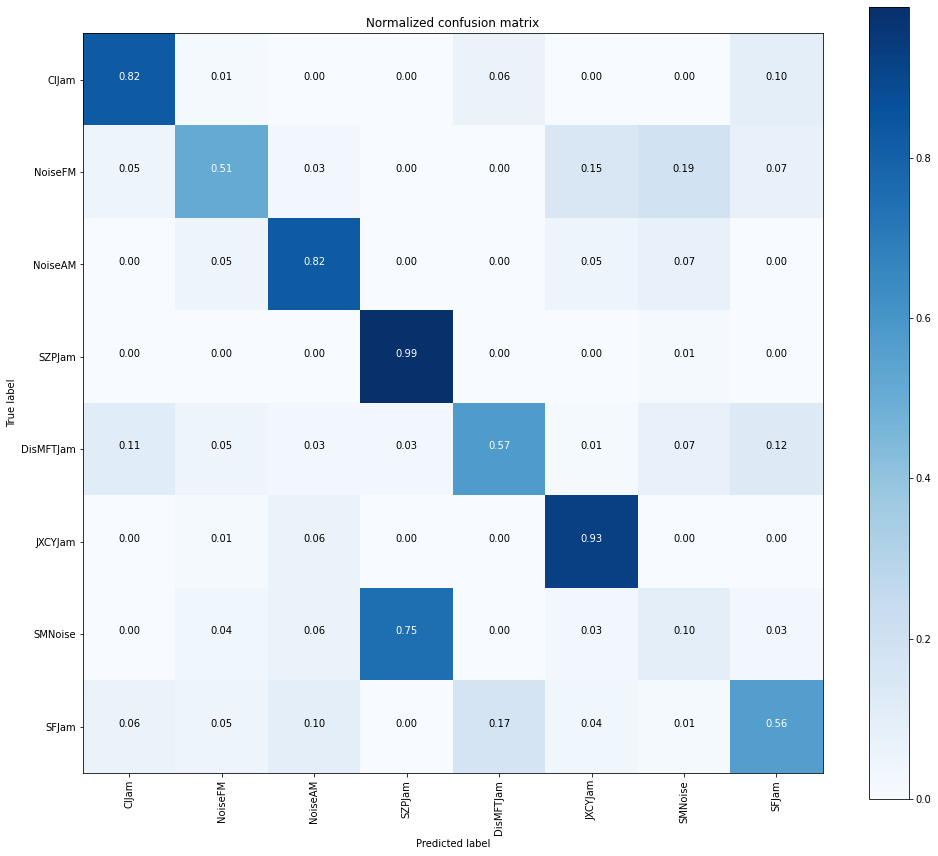

In [38]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

import os
label_names = os.listdir('/root/zhshen/image_calssfication/test/')
cnf_matrix = confusion_matrix(t_labels, t_preds)

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(label_names), normalize=True,
                      title='Normalized confusion matrix')

# fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)